## Домашняя работа

Вариант 1)
1. Прочитайте базу "Потребление Энергии" и сделайте модель для сезонных изменений по data_exp_1 с глубиной прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" .

    1. Оцените ошибку модели из п.1 .
    2. Сделайте вывод о том, как изменилась ошибка модели по значениям h.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error

import os

In [2]:
data = pd.read_csv('DUQ_hourly_1.csv', index_col=[0], parse_dates=[0])

In [3]:
data.head()

,DUQ_MW,date
2005-01-01 01:00:00,1364.0,2005-01-01 01:00:00
2005-01-01 02:00:00,1273.0,2005-01-01 02:00:00
2005-01-01 03:00:00,1218.0,2005-01-01 03:00:00
2005-01-01 04:00:00,1170.0,2005-01-01 04:00:00
2005-01-01 05:00:00,1166.0,2005-01-01 05:00:00


C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


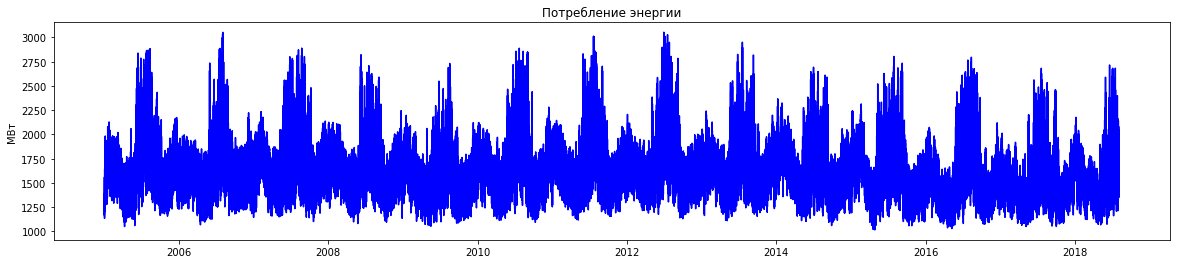

In [4]:
plt.figure(figsize =(20,4))
plt.plot( data.index, data['DUQ_MW'], 'b' )
plt.title('Потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

### Добавление признаков на основе даты

In [5]:
data.drop(columns = ['date'], inplace = True)

In [6]:
data['date'] = data.index

In [7]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['dayofmonth'] = data['date'].dt.day
data['quarter'] = data['date'].dt.quarter
data['dayofyear'] = data['date'].dt.dayofyear
data['weekofyear'] = data['date'].dt.weekofyear
data['dayofweek'] = data['date'].dt.dayofweek
data['hour'] = data['date'].dt.hour

In [8]:
data

,DUQ_MW,date,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour
2005-01-01 01:00:00,1364.0,2005-01-01 01:00:00,2005,1,1,1,1,53,5,1
2005-01-01 02:00:00,1273.0,2005-01-01 02:00:00,2005,1,1,1,1,53,5,2
2005-01-01 03:00:00,1218.0,2005-01-01 03:00:00,2005,1,1,1,1,53,5,3
2005-01-01 04:00:00,1170.0,2005-01-01 04:00:00,2005,1,1,1,1,53,5,4
2005-01-01 05:00:00,1166.0,2005-01-01 05:00:00,2005,1,1,1,1,53,5,5
...,...,...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,1966.0,2018-08-02 20:00:00,2018,8,2,3,214,31,3,20
2018-08-02 21:00:00,1944.0,2018-08-02 21:00:00,2018,8,2,3,214,31,3,21
2018-08-02 22:00:00,1901.0,2018-08-02 22:00:00,2018,8,2,3,214,31,3,22
2018-08-02 23:00:00,1789.0,2018-08-02 23:00:00,2018,8,2,3,214,31,3,23


### Добавление признаков на основе календаря

In [9]:
data_i=pd.MultiIndex.from_arrays([data.index.date, data.index.time], names=['Date','Time'])
data.index = data_i
data.head()

DUQ_MW                date  year  month  dayofmonth  \
Date       Time                                                            
2005-01-01 01:00:00  1364.0 2005-01-01 01:00:00  2005      1           1   
           02:00:00  1273.0 2005-01-01 02:00:00  2005      1           1   
           03:00:00  1218.0 2005-01-01 03:00:00  2005      1           1   
           04:00:00  1170.0 2005-01-01 04:00:00  2005      1           1   
           05:00:00  1166.0 2005-01-01 05:00:00  2005      1           1   

                     quarter  dayofyear  weekofyear  dayofweek  hour  
Date       Time                                                       
2005-01-01 01:00:00        1          1          53          5     1  
           02:00:00        1          1          53          5     2  
           03:00:00        1          1          53          5     3  
           04:00:00        1          1          53          5     4  
           05:00:00        1          1          53          5     5

In [10]:
# теперь уберем служебную колонку data
data.drop( columns = 'date', inplace = True )
data.head()

DUQ_MW  year  month  dayofmonth  quarter  dayofyear  \
Date       Time                                                            
2005-01-01 01:00:00  1364.0  2005      1           1        1          1   
           02:00:00  1273.0  2005      1           1        1          1   
           03:00:00  1218.0  2005      1           1        1          1   
           04:00:00  1170.0  2005      1           1        1          1   
           05:00:00  1166.0  2005      1           1        1          1   

                     weekofyear  dayofweek  hour  
Date       Time                                   
2005-01-01 01:00:00          53          5     1  
           02:00:00          53          5     2  
           03:00:00          53          5     3  
           04:00:00          53          5     4  
           05:00:00          53          5     5

In [11]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from datetime import timedelta
one_day = timedelta(days=1)
cal = calendar()
#инициализировали объект календарь
data['is_holiday'] = data.index.get_level_values('Date').isin([d.date() for d in cal.holidays()])
data['is_prev_holiday'] = data.index.get_level_values('Date').isin([( d.date() - one_day ) for d in cal.holidays()])
data['is_next_holiday'] = data.index.get_level_values('Date').isin([( d.date() + one_day ) for d in cal.holidays()])
data['is_holiday'] = data['is_holiday'].astype('uint8')
data['is_prev_holiday'] = data['is_prev_holiday'].astype('uint8')
data['is_next_holiday'] = data['is_next_holiday'].astype('uint8')

In [12]:
data.head()

DUQ_MW  year  month  dayofmonth  quarter  dayofyear  \
Date       Time                                                            
2005-01-01 01:00:00  1364.0  2005      1           1        1          1   
           02:00:00  1273.0  2005      1           1        1          1   
           03:00:00  1218.0  2005      1           1        1          1   
           04:00:00  1170.0  2005      1           1        1          1   
           05:00:00  1166.0  2005      1           1        1          1   

                     weekofyear  dayofweek  hour  is_holiday  is_prev_holiday  \
Date       Time                                                                 
2005-01-01 01:00:00          53          5     1           0                0   
           02:00:00          53          5     2           0                0   
           03:00:00          53          5     3           0                0   
           04:00:00          53          5     4           0                0   
           05:00:00          53          5     5           0                0   

                     is_next_holiday  
Date       Time                       
2005-01-01 01:00:00                1  
           02:00:00                1  
           03:00:00                1  
           04:00:00                1  
           05:00:00                1

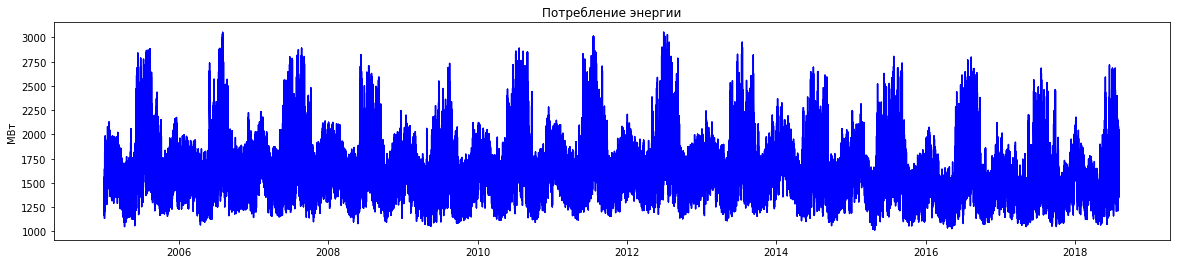

In [13]:
plt.figure(figsize =(20,4))
plt.plot(data.index.get_level_values('Date'),data['DUQ_MW'], 'b' )
plt.title('Потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

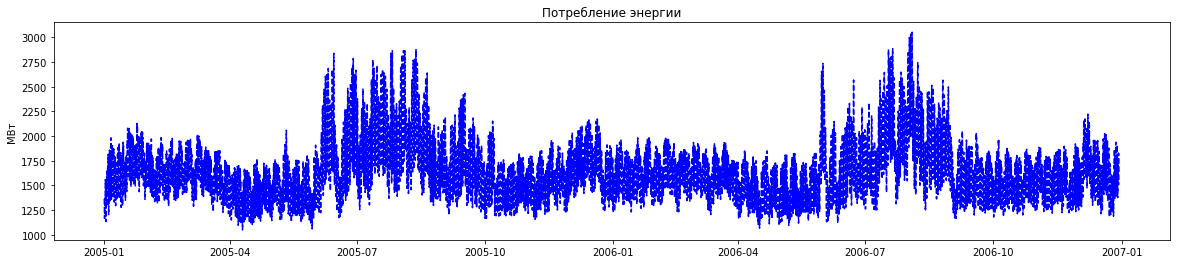

In [14]:
date_time = data['DUQ_MW']
date_time.index = pd.date_range(data.index[0][0], periods=data.index.shape[0], freq="H")
plt.figure(figsize =(20,4))
plt.plot( date_time.index[:24*7*104], date_time.values[:24*7*104], '--b' )

plt.title('Потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

### Сглаживание данных

In [15]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [16]:
data_exp_1 = exponential_smoothing(data['DUQ_MW'], 0.08)

In [17]:
data.index.get_level_values('Date')

DatetimeIndex(['2005-01-01', '2005-01-01', '2005-01-01', '2005-01-01',
               '2005-01-01', '2005-01-01', '2005-01-01', '2005-01-01',
               '2005-01-01', '2005-01-01',
               ...
               '2018-08-02', '2018-08-02', '2018-08-02', '2018-08-02',
               '2018-08-02', '2018-08-02', '2018-08-02', '2018-08-02',
               '2018-08-02', '2018-08-03'],
              dtype='datetime64[ns]', name='Date', length=119088, freq=None)

In [18]:
data['DUQ_MW'].index

DatetimeIndex(['2005-01-01 00:00:00', '2005-01-01 01:00:00',
               '2005-01-01 02:00:00', '2005-01-01 03:00:00',
               '2005-01-01 04:00:00', '2005-01-01 05:00:00',
               '2005-01-01 06:00:00', '2005-01-01 07:00:00',
               '2005-01-01 08:00:00', '2005-01-01 09:00:00',
               ...
               '2018-08-02 14:00:00', '2018-08-02 15:00:00',
               '2018-08-02 16:00:00', '2018-08-02 17:00:00',
               '2018-08-02 18:00:00', '2018-08-02 19:00:00',
               '2018-08-02 20:00:00', '2018-08-02 21:00:00',
               '2018-08-02 22:00:00', '2018-08-02 23:00:00'],
              dtype='datetime64[ns]', length=119088, freq='H')

In [19]:
data['DUQ_MW'].values

array([1364., 1273., 1218., ..., 1901., 1789., 1656.])

Text(0.5, 1.0, 'Потребление энергии')

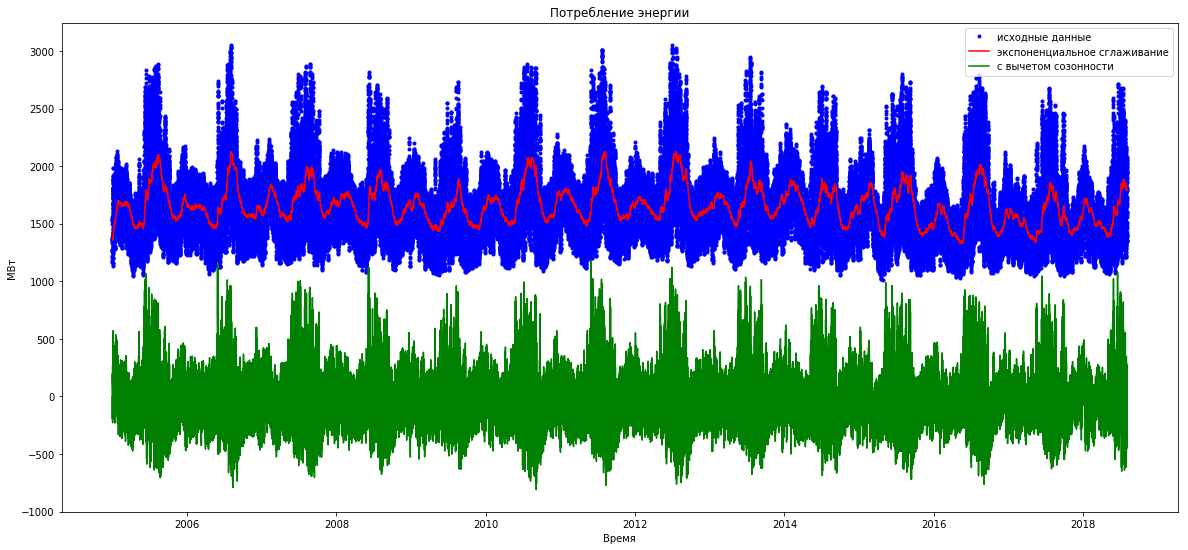

In [20]:
data_exp_1 = exponential_smoothing(data['DUQ_MW'], 0.003)

plt.figure(figsize=(20, 9))

plt.plot(data.index.get_level_values('Date'), data['DUQ_MW'].values, '.b', label="исходные данные");

plt.plot(data.index.get_level_values('Date'), data_exp_1, color = 'red', label="экспоненциальное сглаживание");

plt.plot(data.index.get_level_values('Date'), data['DUQ_MW'].values - data_exp_1, color = 'green', label="с вычетом созонности");

plt.xlabel('Время')
plt.ylabel('МВт')
plt.legend()
plt.title('Потребление энергии')

Text(0.5, 1.0, 'Потребление энергии')

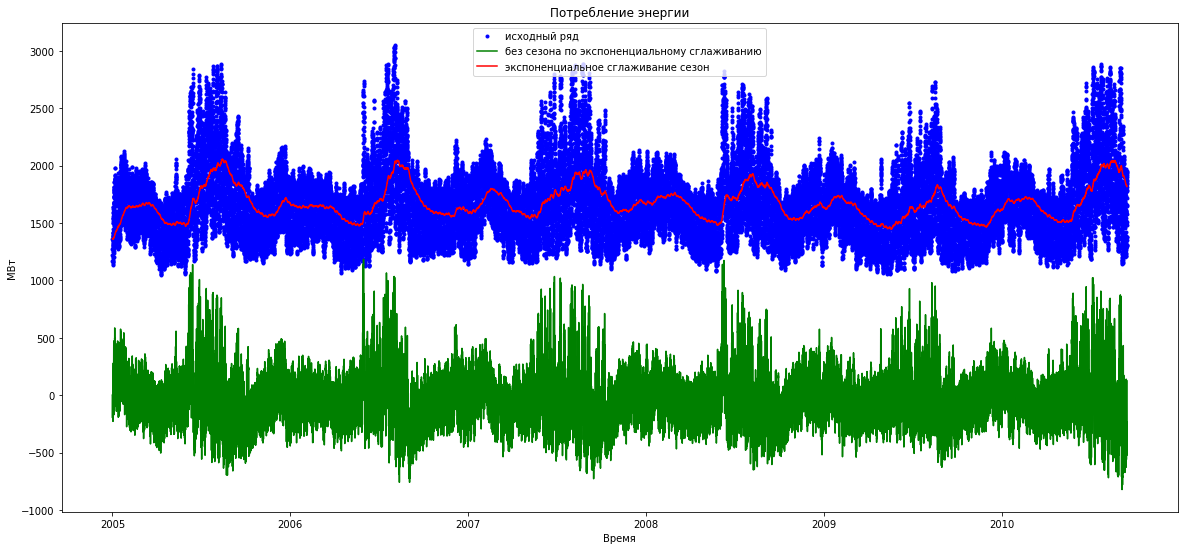

In [21]:
data_exp_1 = exponential_smoothing(data['DUQ_MW']  , 0.002)
plt.figure(figsize=(20, 9))
plt.plot(data['DUQ_MW'].index[:50000], data['DUQ_MW'].values[:50000], '.b',label='исходный ряд')

plt.plot(data['DUQ_MW'].index[:50000], data['DUQ_MW'].values[:50000] - data_exp_1[:50000] , color = 'green', label="без сезона по экспоненциальному сглаживанию");

plt.plot(data['DUQ_MW'].index[:50000], data_exp_1[:50000] , color = 'red', label="экспоненциальное сглаживание сезон");

plt.xlabel('Время')
plt.ylabel('МВт')
plt.legend()
plt.title('Потребление энергии')

In [22]:
data_1 = data.copy()

In [23]:
data_1['data_exp_1'] = data_exp_1

In [24]:
data_1.drop(columns = ['DUQ_MW'], inplace = True)

In [25]:
data_1

year  month  dayofmonth  quarter  dayofyear  weekofyear  \
Date       Time                                                                
2005-01-01 01:00:00  2005      1           1        1          1          53   
           02:00:00  2005      1           1        1          1          53   
           03:00:00  2005      1           1        1          1          53   
           04:00:00  2005      1           1        1          1          53   
           05:00:00  2005      1           1        1          1          53   
...                   ...    ...         ...      ...        ...         ...   
2018-08-02 20:00:00  2018      8           2        3        214          31   
           21:00:00  2018      8           2        3        214          31   
           22:00:00  2018      8           2        3        214          31   
           23:00:00  2018      8           2        3        214          31   
2018-08-03 00:00:00  2018      8           3        3        215          31   

                     dayofweek  hour  is_holiday  is_prev_holiday  \
Date       Time                                                     
2005-01-01 01:00:00          5     1           0                0   
           02:00:00          5     2           0                0   
           03:00:00          5     3           0                0   
           04:00:00          5     4           0                0   
           05:00:00          5     5           0                0   
...                        ...   ...         ...              ...   
2018-08-02 20:00:00          3    20           0                0   
           21:00:00          3    21           0                0   
           22:00:00          3    22           0                0   
           23:00:00          3    23           0                0   
2018-08-03 00:00:00          4     0           0                0   

                     is_next_holiday   data_exp_1  
Date       Time                                    
2005-01-01 01:00:00                1  1364.000000  
           02:00:00                1  1363.818000  
           03:00:00                1  1363.526364  
           04:00:00                1  1363.139311  
           05:00:00                1  1362.745033  
...                              ...          ...  
2018-08-02 20:00:00                0  1790.631370  
           21:00:00                0  1790.938107  
           22:00:00                0  1791.158231  
           23:00:00                0  1791.153914  
2018-08-03 00:00:00                0  1790.883607  

[119088 rows x 12 columns]

In [26]:
#  # добавили историю на глубину 3 измерения от текущего (р=3)
# data['t'] = 0
# data.iloc[1:,12]=data.iloc[:-1,11].values
# data['t1'] = 0
# data.iloc[2:,13]=data.iloc[:-2,11].values
# data['t2'] = 0
# data.iloc[3:,14]=data.iloc[:-3,11].values
# data.fillna(0)

data_1['t'] = data_1['data_exp_1'].shift(1).fillna(0)
data_1['t1'] = data_1['data_exp_1'].shift(2).fillna(0)
data_1['t2'] = data_1['data_exp_1'].shift(3).fillna(0)

In [27]:
# добавили сглаживание
data_1['exp_0_01'] = exponential_smoothing(data_1['data_exp_1'], 0.01)
data_1['exp_0_03'] = exponential_smoothing(data_1['data_exp_1'], 0.03)
data_1['exp_0_08'] = exponential_smoothing(data_1['data_exp_1'], 0.08)

In [28]:
#data['data_exp_1'].shift(1).fillna(0)

In [29]:
# добавим разности - 1-й порядок
data_1['diff1'] = (data_1['data_exp_1'] - data_1['data_exp_1'].shift(1)).fillna(0)
data_1.head()

year  month  dayofmonth  quarter  dayofyear  weekofyear  \
Date       Time                                                                
2005-01-01 01:00:00  2005      1           1        1          1          53   
           02:00:00  2005      1           1        1          1          53   
           03:00:00  2005      1           1        1          1          53   
           04:00:00  2005      1           1        1          1          53   
           05:00:00  2005      1           1        1          1          53   

                     dayofweek  hour  is_holiday  is_prev_holiday  \
Date       Time                                                     
2005-01-01 01:00:00          5     1           0                0   
           02:00:00          5     2           0                0   
           03:00:00          5     3           0                0   
           04:00:00          5     4           0                0   
           05:00:00          5     5           0                0   

                     is_next_holiday   data_exp_1            t           t1  \
Date       Time                                                               
2005-01-01 01:00:00                1  1364.000000     0.000000     0.000000   
           02:00:00                1  1363.818000  1364.000000     0.000000   
           03:00:00                1  1363.526364  1363.818000  1364.000000   
           04:00:00                1  1363.139311  1363.526364  1363.818000   
           05:00:00                1  1362.745033  1363.139311  1363.526364   

                           t2     exp_0_01     exp_0_03     exp_0_08     diff1  
Date       Time                                                                 
2005-01-01 01:00:00     0.000  1364.000000  1364.000000  1364.000000  0.000000  
           02:00:00     0.000  1363.998180  1363.994540  1363.985440 -0.182000  
           03:00:00     0.000  1363.993462  1363.980495  1363.948714 -0.291636  
           04:00:00  1364.000  1363.984920  1363.955259  1363.883962 -0.387053  
           05:00:00  1363.818  1363.972521  1363.918952  1363.792847 -0.394279

### Разбиение на тренировочную и валидационную части

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

In [31]:
def split_data_b(data, split_date):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

In [32]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [42]:
train_data, valid_data = split_data_b(data_1, '01-01-2016')

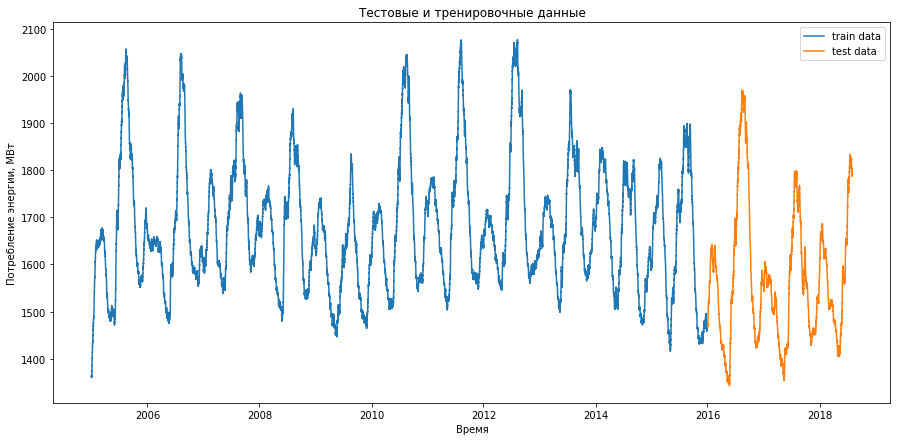

In [55]:
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train_data.index.get_level_values('Date'),train_data['data_exp_1'], label='train data' )
plt.plot(valid_data.index.get_level_values('Date'),valid_data['data_exp_1'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

### Предсказание на 1 шаг вперед

In [43]:
X_train_data = train_data.iloc[:-1,:]
y_train_data = train_data['data_exp_1'].values[1:]
X_valid_data = valid_data.iloc[:-1,:]
y_valid_data = valid_data['data_exp_1'].values[1:]

In [44]:
model_gb = GradientBoostingRegressor(max_depth=8, random_state=0, n_estimators=100)
model_gb.fit(X_train_data, y_train_data) 

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [45]:
X_valid_pred_gb = model_gb.predict(X_valid_data)

In [49]:
X_valid_pred_gb.shape

(22656,)

In [51]:
data['DUQ_MW'].values.shape

(119088,)

In [52]:
data['DUQ_MW'].values.shape[0] - X_valid_pred_gb.shape[0]

96432

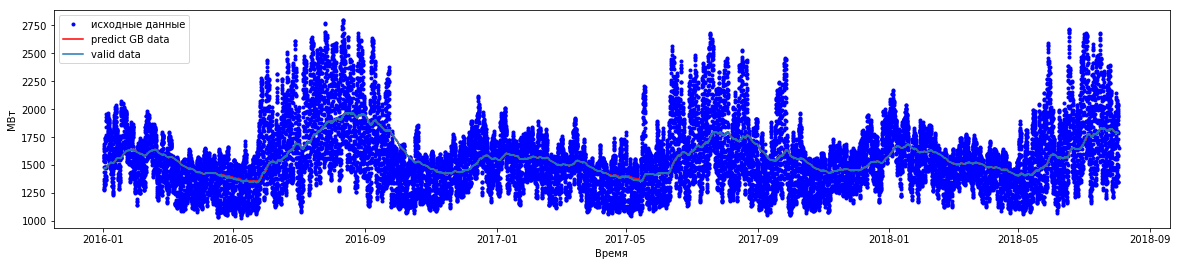

ошибка градиентного бустинга :   0.053744677731079396 %


In [53]:
plt.figure(figsize=(20, 4))

plt.xlabel('Время')
plt.ylabel('МВт')
plt.plot(data.index.get_level_values('Date')[96432:], data['DUQ_MW'].values[96432:], '.b', label="исходные данные")
plt.plot(X_valid_data.index.get_level_values('Date'), X_valid_pred_gb, 'r', label='predict GB data')
plt.plot(X_valid_data.index.get_level_values('Date'), y_valid_data, label='valid data')


plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_valid_data, y_pred=X_valid_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

### Предсказание на 10 шагов вперед

In [56]:
h=10

In [57]:
X_train_data = train_data.iloc[:-h,:]
y_train_data = train_data['data_exp_1'].values[h:]
X_valid_data = valid_data.iloc[:-h,:]
y_valid_data = valid_data['data_exp_1'].values[h:]

In [58]:
model_gb.fit(X_train_data, y_train_data)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [73]:
X_valid_pred_gb = model_gb.predict(X_valid_data)

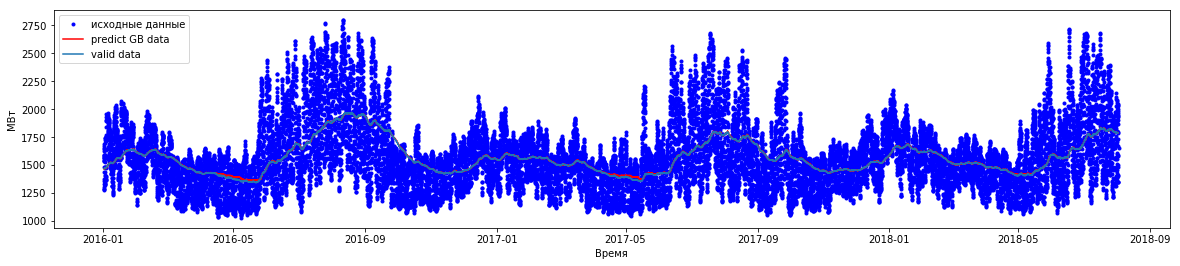

ошибка градиентного бустинга :   0.19296047302287025 %


In [75]:
plt.figure(figsize=(20, 4))

plt.xlabel('Время')
plt.ylabel('МВт')
plt.plot(data.index.get_level_values('Date')[96432:], data['DUQ_MW'].values[96432:], '.b', label="исходные данные")
plt.plot(X_valid_data.index.get_level_values('Date'), X_valid_pred_gb, 'r', label='predict GB data')
plt.plot(X_valid_data.index.get_level_values('Date'), y_valid_data, label='valid data')


plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_valid_data, y_pred=X_valid_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

### При увеличении h (количество шагов, на которые предсказываем) ошибка предсказания увеличивается

Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

а) Изменение температуры за окном :).

б) Количество денег, которые тратят покупатели в интернет магазине.

в) Вес растущего котенка.

г) Прирост объема деревьев в лесу от времени

a - сезонный и с суточным циклом
б - если брать конкретный часовой пояс, то должен быть суточный цикл
в - имеет тренд
г - сезонный цикл если есть разница между сезонами (засушливый/дождевой, холодный/теплый периоды)